<a href="https://colab.research.google.com/github/MuradovMaks/NewsClassification_AutoML/blob/main/NewsClassification_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yutkin/corpus-of-russian-news-articles-from-lenta")

In [ ]:
!pip install autokeras==1.1.0 tensorflow==2.15.1 keras-nlp==0.5.1

In [ ]:
# Библиотека матричного вычисления
import numpy as np
# Библиотека для работы с данными
import pandas as pd
# Библиотека для работы с регулярными выражениями
import re
# Библиотека для работы с фреймворком TensorFlow
import tensorflow as tf
# Библиотека AutoML autokeras
import autokeras as ak
# Библиотеки для построения графиков и их стилизации
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Утилита для расщепления выборки
from sklearn.model_selection import train_test_split

# Необходимые метрики для построения Матрицы ошибок и отчета о классификации
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import pandas as pd
import os


files = os.listdir(path)

df = None

for fil in files:
  if fil.endswith('.csv'):
    df = fil
    break

In [ ]:
df = pd.read_csv(os.path.join(path,df))
df.head(5)

<ipython-input-5-54b84451fb5d>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,df))


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


In [ ]:
df = df.drop('url',axis=1)
df.head(5)

,title,text,topic,tags,date
0,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


In [ ]:
topics = df['topic'].unique()
print(topics)

['Библиотека' 'Россия' 'Мир' 'Экономика' 'Интернет и СМИ' 'Спорт'
 'Культура' 'Из жизни' 'Силовые структуры' 'Наука и техника' 'Бывший СССР'
 nan 'Дом' 'Сочи' 'ЧМ-2014' 'Путешествия' 'Ценности' 'Легпром' 'Бизнес'
 'МедНовости' 'Оружие' '69-я параллель' 'Культпросвет ' 'Крым']


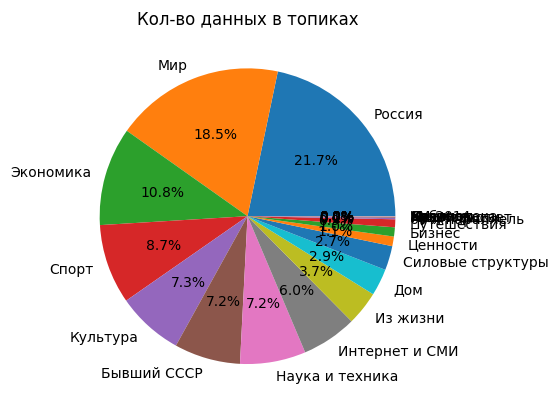

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df['topic'].value_counts(),labels=df['topic'].value_counts().index,autopct='%1.1f%%')
plt.title('Кол-во данных в топиках')
plt.show()

In [ ]:
topic_counts = df['topic'].value_counts()

# Выбираем 9 самых крупных тем
top_9_topics = topic_counts.nlargest(10).index

# Функция для замены тем, не входящих в топ-9, на 'Other'
def categorize_topic(topic):
    if topic in top_9_topics:
        return topic
    else:
        return top_9_topics[-1]

# Применяем функцию к колонке 'topic'
df['topic'] = df['topic'].apply(categorize_topic)

# Теперь у вас есть DataFrame с 9 основными темами и одной категорией 'Other'
print(df['topic'].value_counts())

topic
Россия             160445
Мир                136621
Дом                127365
Экономика           79528
Спорт               64413
Культура            53797
Бывший СССР         53402
Наука и техника     53136
Интернет и СМИ      44663
Из жизни            27605
Name: count, dtype: int64


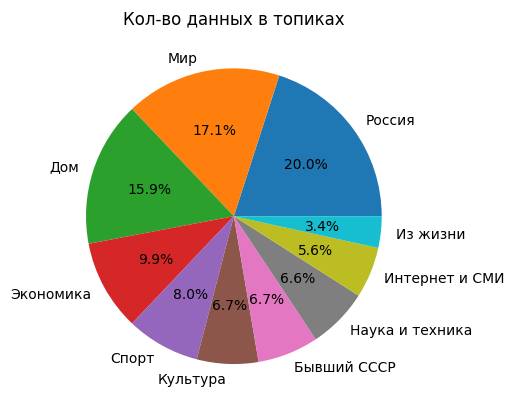

In [ ]:
plt.pie(df['topic'].value_counts(),labels=df['topic'].value_counts().index,autopct='%1.1f%%')
plt.title('Кол-во данных в топиках')
plt.show()

In [ ]:
import re
df['title'] = df['title'].apply(lambda x: re.sub(r'\d+|[^\w\s]', '',str(x)))
df['title'] = df['title'].apply(lambda x: str(x).lower())
df['topic'] = df['topic'].apply(lambda x: str(x).lower())

In [ ]:
df.head(5)

,title,text,topic,tags,date
0,русские войска вступили в пределы венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,дом,Первая мировая,1914/09/16
1,празднование столетия мю лермонтова отложено,"Министерство народного просвещения, в виду про...",дом,Первая мировая,1914/09/16
2,das ist nesteroff,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",дом,Первая мировая,1914/09/17
3,бульдоггонец под льежем,Фотограф-корреспондент Daily Mirror рассказыва...,дом,Первая мировая,1914/09/17
4,под люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",дом,Первая мировая,1914/09/18


In [ ]:
print('Найдено дубликатов: ', df.duplicated().sum())

# Удаляем дубликаты
df.drop_duplicates(subset=['title'], inplace = True)
df.drop_duplicates(subset=['text'], inplace = True)

print('Осталось дубликатов после очистки: ', df.duplicated().sum())

Найдено дубликатов:  5
Осталось дубликатов после очистки:  0


In [ ]:
x_train,x_tmp,y_train,y_tmp = train_test_split(np.array(df.title),np.array(df.topic),test_size=0.3)

x_val,x_test,y_val,y_test = train_test_split(x_tmp,y_tmp,test_size=0.5)


In [ ]:
print('Форма входных данных: ', x_train.shape)
print('Форма выходных меток: ', y_train.shape)
print('Пример заголовка: ', x_train[0])

Форма входных данных:  (556756,)
Форма выходных меток:  (556756,)
Пример заголовка:  keane создали совершенную симметрию


In [ ]:
# Создание ансамбля моделей (3 наиболее подходящие к данным моделей)
clf  = ak.TextClassifier(overwrite=True,max_trials=2,objective='val_accuracy')
# Обучаем 2 модели на 4-х эпохах, размер пакета подбирается автоматически
result_training = clf.fit(x_train,y_train,epochs=4,validation_data=(x_val,y_val))

Trial 2 Complete [00h 15m 36s]
val_accuracy: 0.5964376926422119

Best val_accuracy So Far: 0.6021206378936768
Total elapsed time: 00h 27m 19s
Epoch 1/4
17399/17399 [==============================] - 157s 9ms/step - loss: 1.3236 - accuracy: 0.5555 - val_loss: 1.1924 - val_accuracy: 0.5932
Epoch 2/4
17399/17399 [==============================] - 151s 9ms/step - loss: 1.2124 - accuracy: 0.5898 - val_loss: 1.1715 - val_accuracy: 0.6000
Epoch 3/4
17399/17399 [==============================] - 164s 9ms/step - loss: 1.1889 - accuracy: 0.5955 - val_loss: 1.1688 - val_accuracy: 0.6022
Epoch 4/4
17399/17399 [==============================] - 163s 9ms/step - loss: 1.1754 - accuracy: 0.5997 - val_loss: 1.1681 - val_accuracy: 0.6019


In [ ]:
clf.export_model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [ ]:
#Оценка

y_pred = clf.predict(x_test)

print(clf.evaluate(x_test,y_test))

3729/3729 [==============================] - 23s 6ms/step - loss: 1.1638 - accuracy: 0.6031
[1.1638484001159668, 0.6031381487846375]


In [ ]:
#Визуализация процесса обучения
#Используем seaborn для цвета и стиля

def plot_graphs(history,key):
  sns.set_style('darkgrid')
  palette = sns.color_palette('Set1')

  #Задаем размер полотна
  plt.figure(figsize=(12,6))

  #Отображаем график выбранного параметра

  plt.plot(history.history[key], #Достаем нужный параметр например val_acc,
           marker='o',            #Использовать маркер для точек на графике,
           color=palette[2], #Использовать цвет,3ий в палитре
           linewidth=2.5,  #Ширина линии
           label=key #подпись легенды
           )

  #График для проверочной выборки
  if 'val_'+key in history.history:
    plt.plot(history.history['val_'+key],marker='o',color=palette[4],linewidth=2.5,label='val_'+key)

  plt.xlabel('Эпоха')
  plt.ylabel(key)
  plt.title('Обучающая и проверочная выборки ('+key.title() + ')',fontsize=14)
  plt.legend()
  plt.grid(True)
  plt.show()

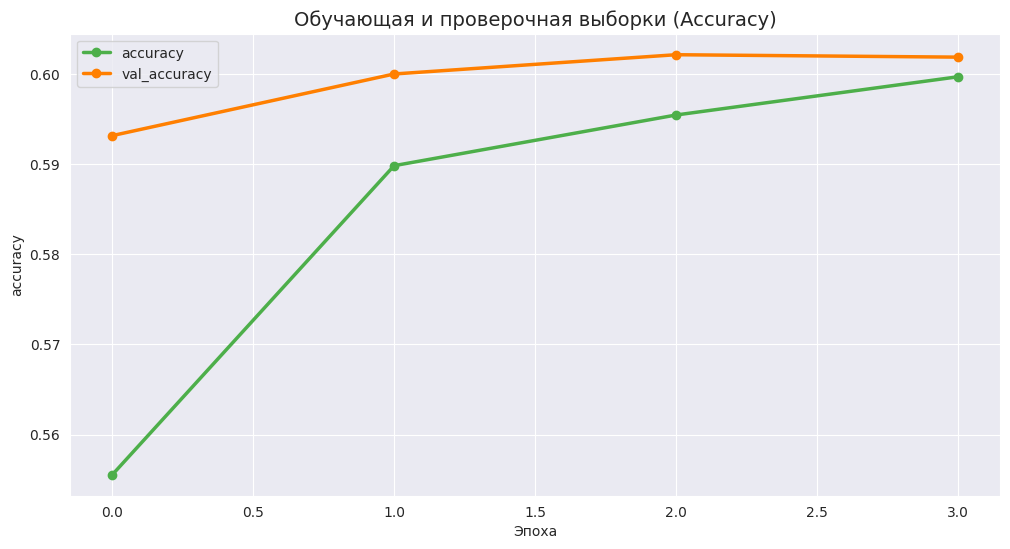

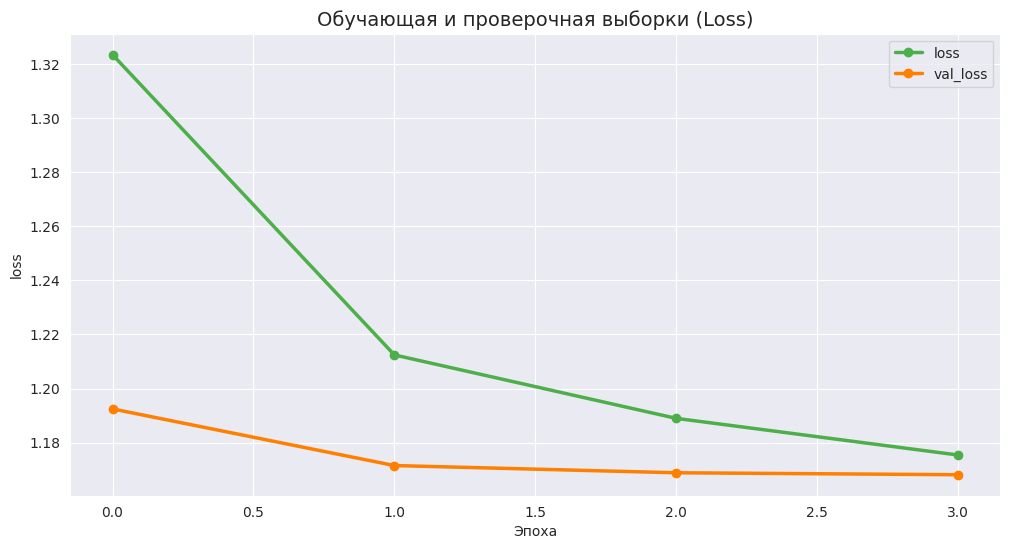

In [ ]:
plot_graphs(result_training,'accuracy')
plot_graphs(result_training,'loss')

In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    бывший ссср       0.65      0.67      0.66      8027
            дом       0.53      0.38      0.45     18712
       из жизни       0.39      0.24      0.30      4102
 интернет и сми       0.61      0.44      0.51      6647
       культура       0.60      0.60      0.60      8039
            мир       0.63      0.68      0.65     20499
наука и техника       0.48      0.65      0.55      7897
         россия       0.57      0.68      0.62     24006
          спорт       0.80      0.83      0.81      9704
      экономика       0.69      0.61      0.65     11673

       accuracy                           0.60    119306
      macro avg       0.59      0.58      0.58    119306
   weighted avg       0.60      0.60      0.60    119306



# Модель классификации показывает себя неудовлетворительно. 60 % в точности это практически означает, что модель колеблется при выборе класса 50/50.Исходя из графика модель достигла хорошей обобщающей способности ,и точность на тренировочной,тестовой и валидационной выборках находится практически на одном и том же значении. Возможно,чтобы улучшить модель классификации стоит обучать ее хотябы по заголовку и тексу,а не по одному из признаков.
# Исходя из отчета о классификации,мы видим что класс "Из жизни" определяется наихудшим образом,что ,возможно,зависит от малого количества примеров в данной области и классы в не сбалансированы